### Import generic

In [1]:
#So first we need to cluster the players on height, weight and stats (Use PCA), 
#after that we would ML on the dataset where we have player and their cluster. 
#year they are in and VORP and or total win share.

In [2]:
# Importing required modules
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## ML && PCA
# Standardize the data with StandardScaler().
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
nba_data = pd.read_csv('Resources/dataset_clean.csv')
#, index_col='Player'

In [4]:
## Drop height since the format is 5-10 and not "cm" unit
del nba_data['height']

del nba_data['blanl']
del nba_data['blank2']
del nba_data['3P%']
del nba_data['FT%']

In [5]:
# Create a new DataFrame that holds only the cryptocurrencies names.
nba_label_df = pd.DataFrame(nba_data.Player)
nba_label_df.set_index("Player")
nba_label_df

,Player
0,Tariq Abdul-Wahad
1,Shareef Abdur-Rahim
2,Shareef Abdur-Rahim
3,Shareef Abdur-Rahim
4,Shareef Abdur-Rahim
...,...
6268,Troy Williams
6269,Kyle Wiltjer
6270,Stephen Zimmerman
6271,Paul Zipser


In [6]:
del nba_data['Player']   
# nba_data = nba_data.drop(columns="Player")

## Generic Information

In [7]:
nba_data.head(15)

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status
0,2003,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,...,40,21,6,3,7,26,57,1998,223,6
1,2003,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,...,677,242,87,38,212,240,1608,1997,225,7
2,2004,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,...,639,174,68,37,184,222,1384,1997,225,8
3,2005,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,...,392,111,49,26,117,150,909,1997,225,9
4,2006,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,...,357,149,48,42,108,227,887,1997,225,10
5,2007,30,80,2015,13.1,0.524,0.031,0.358,7.0,16.4,...,398,109,53,40,116,243,793,1997,225,11
6,2003,25,66,1360,9.3,0.459,0.113,0.289,3.3,6.8,...,118,79,31,6,68,125,523,2001,205,3
7,2003,24,80,2318,9.9,0.455,0.005,0.153,6.5,14.9,...,425,54,37,78,128,234,767,2002,255,2
8,2004,25,45,616,10.5,0.449,0.000,0.167,7.9,14.7,...,119,16,12,28,27,81,191,2002,255,3
9,2005,26,36,519,14.2,0.512,0.000,0.158,9.0,13.3,...,99,18,9,22,18,53,194,2002,255,4


In [8]:
# summarize the nba_data
nba_data.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,...,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,2010.168181,26.614220,58.027579,1368.446517,13.204193,0.518046,0.224275,0.296625,5.653228,14.582544,...,238.516659,122.077794,42.679420,27.359955,78.094532,119.010681,559.585525,2005.327754,221.479675,5.840427
std,4.311041,4.225402,20.839700,860.169059,4.656013,0.062482,0.202405,0.161223,4.027958,5.680427,...,194.607052,133.931774,33.637848,34.168039,61.153452,68.348529,462.276023,5.772833,27.041645,4.017287
min,2003.000000,18.000000,11.000000,31.000000,-9.100000,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1985.000000,135.000000,1.000000
25%,2006.000000,23.000000,43.000000,600.000000,10.300000,0.487000,0.013000,0.189000,2.200000,10.000000,...,90.000000,29.000000,15.000000,6.000000,29.000000,62.000000,182.000000,2001.000000,200.000000,2.000000
50%,2010.000000,26.000000,64.000000,1325.000000,13.000000,0.524000,0.209000,0.268000,4.400000,13.600000,...,191.000000,77.000000,36.000000,16.000000,64.000000,119.000000,452.000000,2005.000000,220.000000,5.000000
75%,2014.000000,30.000000,76.000000,2066.000000,15.900000,0.556000,0.382000,0.371000,8.600000,18.400000,...,332.000000,164.000000,62.000000,34.000000,112.000000,170.000000,828.000000,2010.000000,240.000000,9.000000
max,2017.000000,42.000000,85.000000,3401.000000,31.700000,0.737000,0.941000,2.400000,27.200000,38.600000,...,1226.000000,925.000000,217.000000,307.000000,464.000000,344.000000,2832.000000,2017.000000,308.000000,21.000000


In [9]:
nba_data.nunique()

Year            15
Age             25
G               75
MP            2675
PER            306
TS%            410
3PAr           749
FTr            751
ORB%           189
DRB%           304
TRB%           227
AST%           451
STL%            49
BLK%            97
TOV%           297
USG%           296
OWS            154
DWS             81
WS             182
WS/48          409
OBPM           204
DBPM           126
BPM            240
VORP           110
FG             714
FGA           1345
FG%            414
3P             233
3PA            527
2P             634
2PA           1135
2P%            407
eFG%           406
FT             502
FTA            597
ORB            305
DRB            629
TRB            821
AST            599
STL            181
BLK            211
TOV            302
PF             304
PTS           1596
year_start      32
weight         117
Status          21
dtype: int64

In [10]:
nba_data.dtypes

Year            int64
Age             int64
G               int64
MP              int64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG              int64
FGA             int64
FG%           float64
3P              int64
3PA             int64
2P              int64
2PA             int64
2P%           float64
eFG%          float64
FT              int64
FTA             int64
ORB             int64
DRB             int64
TRB             int64
AST             int64
STL             int64
BLK             int64
TOV             int64
PF              int64
PTS             int64
year_start      int64
weight    

In [11]:
nba_data.shape

(6273, 47)

In [12]:
# Print all Columns
print(nba_data.columns.tolist())

['Year', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'year_start', 'weight', 'Status']


In [13]:
# List NA
nba_data.isna().sum()

Year          0
Age           0
G             0
MP            0
PER           0
TS%           0
3PAr          0
FTr           0
ORB%          0
DRB%          0
TRB%          0
AST%          0
STL%          0
BLK%          0
TOV%          0
USG%          0
OWS           0
DWS           0
WS            0
WS/48         0
OBPM          0
DBPM          0
BPM           0
VORP          0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
year_start    0
weight        0
Status        0
dtype: int64

In [14]:
nba_data.dropna()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status
0,2003,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,...,40,21,6,3,7,26,57,1998,223,6
1,2003,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,...,677,242,87,38,212,240,1608,1997,225,7
2,2004,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,...,639,174,68,37,184,222,1384,1997,225,8
3,2005,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,...,392,111,49,26,117,150,909,1997,225,9
4,2006,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,...,357,149,48,42,108,227,887,1997,225,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,2017,22,30,557,8.9,0.511,0.371,0.192,3.0,11.2,...,69,25,27,10,33,60,185,2017,218,1
6269,2017,24,14,44,6.7,0.437,0.929,0.143,9.9,14.9,...,10,2,3,1,5,4,13,2017,240,1
6270,2017,20,19,108,7.3,0.346,0.000,0.161,10.8,24.9,...,35,4,2,5,3,17,23,2017,240,1
6271,2017,22,44,843,6.9,0.503,0.448,0.181,1.9,14.2,...,125,36,15,16,40,78,240,2017,215,1


In [15]:
nba_data.isna().sum()

Year          0
Age           0
G             0
MP            0
PER           0
TS%           0
3PAr          0
FTr           0
ORB%          0
DRB%          0
TRB%          0
AST%          0
STL%          0
BLK%          0
TOV%          0
USG%          0
OWS           0
DWS           0
WS            0
WS/48         0
OBPM          0
DBPM          0
BPM           0
VORP          0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
year_start    0
weight        0
Status        0
dtype: int64

## Principal Component Analysis
### https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

In [16]:
# df.dropna(how="all", inplace=True) # drops the empty line at file-end

In [17]:
nba_data.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,...,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,2010.168181,26.614220,58.027579,1368.446517,13.204193,0.518046,0.224275,0.296625,5.653228,14.582544,...,238.516659,122.077794,42.679420,27.359955,78.094532,119.010681,559.585525,2005.327754,221.479675,5.840427
std,4.311041,4.225402,20.839700,860.169059,4.656013,0.062482,0.202405,0.161223,4.027958,5.680427,...,194.607052,133.931774,33.637848,34.168039,61.153452,68.348529,462.276023,5.772833,27.041645,4.017287
min,2003.000000,18.000000,11.000000,31.000000,-9.100000,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1985.000000,135.000000,1.000000
25%,2006.000000,23.000000,43.000000,600.000000,10.300000,0.487000,0.013000,0.189000,2.200000,10.000000,...,90.000000,29.000000,15.000000,6.000000,29.000000,62.000000,182.000000,2001.000000,200.000000,2.000000
50%,2010.000000,26.000000,64.000000,1325.000000,13.000000,0.524000,0.209000,0.268000,4.400000,13.600000,...,191.000000,77.000000,36.000000,16.000000,64.000000,119.000000,452.000000,2005.000000,220.000000,5.000000
75%,2014.000000,30.000000,76.000000,2066.000000,15.900000,0.556000,0.382000,0.371000,8.600000,18.400000,...,332.000000,164.000000,62.000000,34.000000,112.000000,170.000000,828.000000,2010.000000,240.000000,9.000000
max,2017.000000,42.000000,85.000000,3401.000000,31.700000,0.737000,0.941000,2.400000,27.200000,38.600000,...,1226.000000,925.000000,217.000000,307.000000,464.000000,344.000000,2832.000000,2017.000000,308.000000,21.000000


In [18]:
 iris_scaled = StandardScaler().fit_transform(nba_data)
print(iris_scaled[0:5])

[[-1.66288214  0.3279903  -2.11284658 -1.35384937 -0.17273505 -0.76901737
  -1.02413819 -1.20107237  0.48335338 -0.10256107  0.15254842  0.27017459
  -0.12586035 -0.32690739 -0.7897534  -0.74657275 -0.60948998 -0.98839429
  -0.82697205  0.35109489 -0.01073215  0.51155514  0.26819008 -0.41496879
  -1.0794891  -1.11616743  0.3444179  -0.78985926 -0.83402936 -0.97326084
  -1.0033584   0.09478142 -0.23644875 -0.93504946 -0.96730028 -0.79817774
  -1.06218637 -1.02017107 -0.75475631 -1.09050803 -0.71300249 -1.16265226
  -1.36093778 -1.08728458 -1.26945272  0.05622611  0.03972469]
 [-1.66288214 -0.1453752   1.10242724  1.99808452  1.4382135   0.76753748
  -0.85614517  0.9948155   0.25989729  0.56645605  0.53110094  0.19324788
  -0.12586035 -0.45240478 -0.19886698  1.12728976  2.74104319  0.75776542
   2.25093408  1.08637635  1.18306222 -0.10774447  0.93963104  1.48633723
   2.11770302  1.99496008  0.52199843 -0.35817522 -0.37300865  2.53845392
   2.59943153  0.25569577  0.09191338  3.28339183

In [19]:
# Using PCA to reduce dimension to three principal components.
# Initialize PCA model
pca = PCA(n_components=4)
# Get tree principal components for the iris data.
nba_data_pca = pca.fit_transform(iris_scaled)

In [20]:

# Create a DataFrame with the three principal components.
# Transform PCA to DF
pcs_df = pd.DataFrame(data=nba_data_pca, columns=("PC 1", "PC 2","PC 3", "PC 4"), index=nba_label_df.index)
pcs_df.head(15)

,PC 1,PC 2,PC 3,PC 4
0,-4.241400,0.857309,-0.833946,1.607266
1,9.222855,0.514265,2.730620,-0.031811
2,7.342653,1.167219,2.527541,0.116650
3,3.528702,1.185185,0.052877,0.934884
4,4.046283,1.482439,-0.137076,1.410089
5,2.097778,1.383158,1.986343,1.307466
6,-2.277484,-1.954021,2.349672,-0.754834
7,0.717573,1.938539,4.214201,-0.971772
8,-3.838303,1.877234,1.523368,-0.196700
9,-3.066278,2.059089,-0.696572,0.038271


In [21]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

### Exploratory Visualization

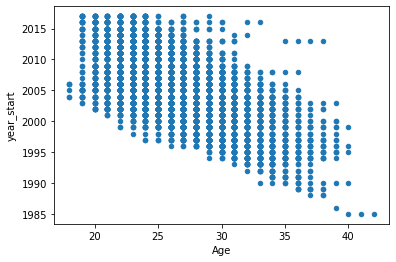

In [22]:
nba_data.plot(x ='Age', y='year_start', kind = 'scatter')	
plt.show()

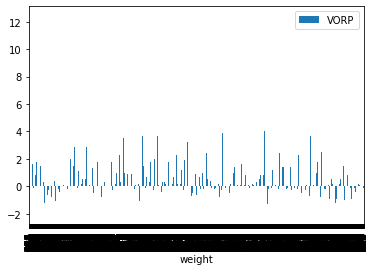

In [23]:
nba_data.plot(x ='weight', y='VORP', kind = 'bar')
plt.show()

## Resources

In [24]:
### PCA
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/
# https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
# https://towardsdatascience.com/redefining-nba-player-classifications-using-clustering-36a348fa54a8